# Explore here

In [1]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('../data/raw/Crypto Data Since 2015.csv')
df.head()

,Date,Bitcoin (USD),Ethereum (USD),Gold (USD per oz),Cardano (ADA),Binance Coin (BNB),Ripple (XRP),Dogecoin (DOGE),Solana (SOL)
0,2015-01-01,1099.671415,102.760097,1199.071870,0.490443,19.915520,0.209481,0.045930,5.987009
1,2015-01-02,1135.844985,110.806193,1201.928708,0.526877,20.271863,0.222041,0.054818,5.687508
2,2015-01-03,1250.613839,116.286699,1201.829678,0.520009,19.974075,0.229863,0.049255,7.050012
3,2015-01-04,1452.916825,118.393314,1199.858272,0.563435,19.942816,0.243224,0.047298,7.903578
4,2015-01-05,1479.501487,128.322865,1200.014190,0.644235,20.201745,0.238137,0.044584,8.140522


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3858 non-null   object 
 1   Bitcoin (USD)       3858 non-null   float64
 2   Ethereum (USD)      3858 non-null   float64
 3   Gold (USD per oz)   3858 non-null   float64
 4   Cardano (ADA)       3858 non-null   float64
 5   Binance Coin (BNB)  3858 non-null   float64
 6   Ripple (XRP)        3858 non-null   float64
 7   Dogecoin (DOGE)     3858 non-null   float64
 8   Solana (SOL)        3858 non-null   float64
dtypes: float64(8), object(1)
memory usage: 271.4+ KB


In [4]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3858 non-null   object 
 1   Bitcoin (USD)       3858 non-null   float64
 2   Ethereum (USD)      3858 non-null   float64
 3   Gold (USD per oz)   3858 non-null   float64
 4   Cardano (ADA)       3858 non-null   float64
 5   Binance Coin (BNB)  3858 non-null   float64
 6   Ripple (XRP)        3858 non-null   float64
 7   Dogecoin (DOGE)     3858 non-null   float64
 8   Solana (SOL)        3858 non-null   float64
dtypes: float64(8), object(1)
memory usage: 271.4+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3858 non-null   datetime64[ns]
 1   Bitcoin (USD)       3858 non-null   float64       
 2   Ethereum (USD)      3858 non-null   float64       
 3   Gold (USD per oz)   3858 non-null   float64       
 4   Cardano (ADA)       3858 non-null   float64       
 5   Binance Coin (BNB)  3858 non-null   float64       
 6   Ripple (XRP)        3858 non-null   float64       
 7   Dogecoin (DOGE)     3858 non-null   float64       
 8   Solana (SOL)        3858 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 271.4 KB


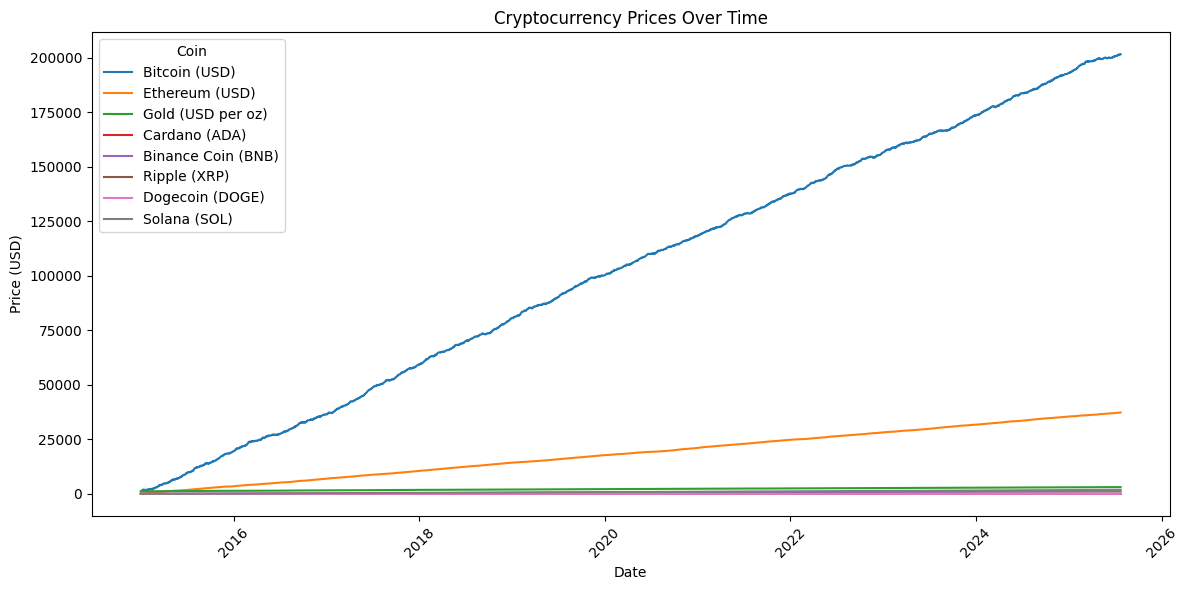

In [6]:
plt.figure(figsize=(12,6))
for columns in df.columns:
    if columns not in ['Date']:
        sns.lineplot(data=df, x='Date', y=columns, label=columns)
plt.title('Cryptocurrency Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(title='Coin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
#encontrar el maximo de Date
max_date = df['Date'].max()
print("La fecha más reciente en el conjunto de datos es:", max_date)

La fecha más reciente en el conjunto de datos es: 2025-07-24 00:00:00


In [8]:
#separar nuestro conjunto de entrenamiento en train y test
#test sera los ultimos 6 meses de datos
from datetime import timedelta
test_start_date = max_date - timedelta(days=180)
train = df[df['Date'] < test_start_date]
test = df[df['Date'] >= test_start_date]
print(f'Train set Size:{train.shape}')
print(f'Test set Size:{test.shape}')

Train set Size:(3677, 9)
Test set Size:(181, 9)


In [9]:
# Escalar las columnas de precios
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
price_columns = df.columns.difference(['Date'])
train[price_columns] = scaler.fit_transform(train[price_columns])
test[price_columns] = scaler.transform(test[price_columns])
train.head()

/var/folders/rh/skw4t7l104sddrv00lwrwjs40000gn/T/ipykernel_74993/642966036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[price_columns] = scaler.fit_transform(train[price_columns])
/var/folders/rh/skw4t7l104sddrv00lwrwjs40000gn/T/ipykernel_74993/642966036.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[price_columns] = scaler.transform(test[price_columns])


,Date,Bitcoin (USD),Ethereum (USD),Gold (USD per oz),Cardano (ADA),Binance Coin (BNB),Ripple (XRP),Dogecoin (DOGE),Solana (SOL)
0,2015-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000178,0.000169
1,2015-01-02,0.000187,0.000226,0.001551,0.000465,0.000312,0.000350,0.001352,0.000000
2,2015-01-03,0.000781,0.000380,0.001497,0.000378,0.000051,0.000568,0.000617,0.000770
3,2015-01-04,0.001827,0.000440,0.000427,0.000932,0.000024,0.000941,0.000359,0.001253
4,2015-01-05,0.001964,0.000719,0.000512,0.001964,0.000251,0.000799,0.000000,0.001386


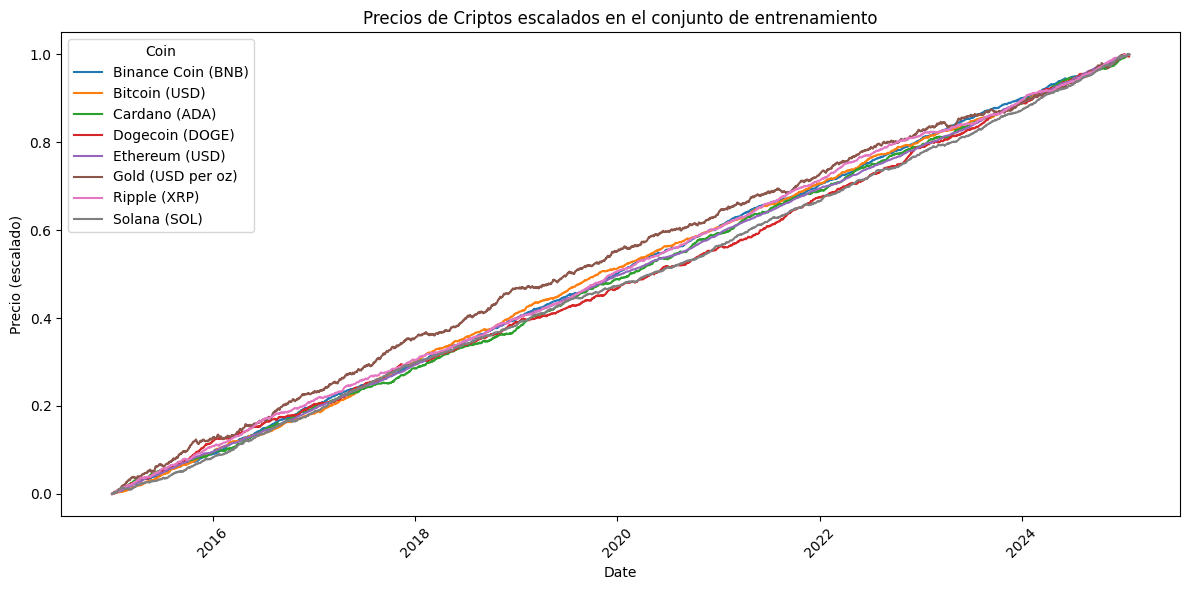

In [10]:
#graficar datos escalados
plt.figure(figsize=(12,6))
for column in price_columns:
    sns.lineplot(data=train,x='Date',y=column,label=column)
plt.title('Precios de Criptos escalados en el conjunto de entrenamiento')
plt.xlabel('Date')
plt.ylabel('Precio (escalado)')
plt.legend(title='Coin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


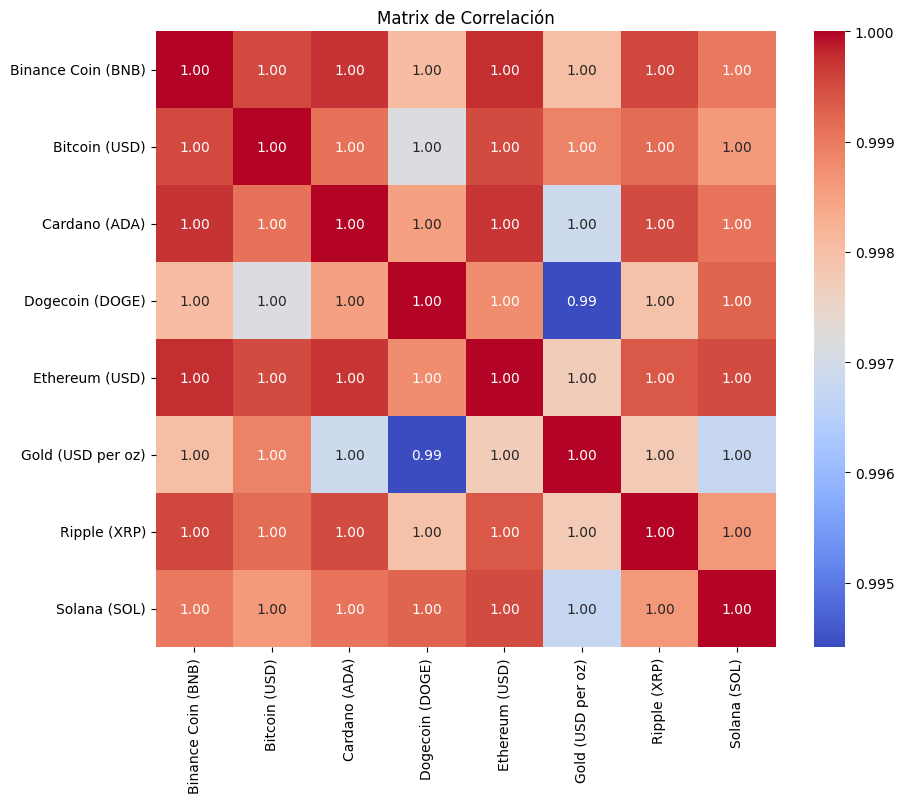

In [11]:
#grafico de correlación 
plt.figure(figsize=(10,8))
correlation_matrix = train[price_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",cmap='coolwarm')
plt.title('Matrix de Correlación')
plt.tight_layout
plt.show()



In [12]:
#nuestra variable a predecir sera el precio del Ethereum (ETH) y vamos a buscar otros precios desfazados por 5 dias
def create_lagged_features(df, target_column, lag=15):
    for i in range(1,lag+1):
        df[f'{target_column}_lag_{i}']=df[target_column].shift(i)
    return df
train = create_lagged_features(train,'Ethereum (USD)',lag=15)
test = create_lagged_features(test,'Ethereum (USD)',lag=15)
#eliminar filas con valores NaN
train.dropna(inplace=True)
test.dropna(inplace=True)
#Verificar las primeras filas del conjunto de entrenamiento
train.head()


/var/folders/rh/skw4t7l104sddrv00lwrwjs40000gn/T/ipykernel_74993/513966177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{target_column}_lag_{i}']=df[target_column].shift(i)
/var/folders/rh/skw4t7l104sddrv00lwrwjs40000gn/T/ipykernel_74993/513966177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{target_column}_lag_{i}']=df[target_column].shift(i)
/var/folders/rh/skw4t7l104sddrv00lwrwjs40000gn/T/ipykernel_74993/513966177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

,Date,Bitcoin (USD),Ethereum (USD),Gold (USD per oz),Cardano (ADA),Binance Coin (BNB),Ripple (XRP),Dogecoin (DOGE),Solana (SOL),Ethereum (USD)_lag_1,...,Ethereum (USD)_lag_6,Ethereum (USD)_lag_7,Ethereum (USD)_lag_8,Ethereum (USD)_lag_9,Ethereum (USD)_lag_10,Ethereum (USD)_lag_11,Ethereum (USD)_lag_12,Ethereum (USD)_lag_13,Ethereum (USD)_lag_14,Ethereum (USD)_lag_15
15,2015-01-16,0.003412,0.003247,0.004851,0.003786,0.004423,0.005220,0.005317,0.003985,0.003381,...,0.002310,0.001564,0.001193,0.001116,0.000940,0.000719,0.000440,0.000380,0.000226,0.000000
16,2015-01-17,0.003146,0.003320,0.004683,0.004402,0.005095,0.005632,0.006297,0.004882,0.003247,...,0.002631,0.002310,0.001564,0.001193,0.001116,0.000940,0.000719,0.000440,0.000380,0.000226
17,2015-01-18,0.003567,0.003937,0.004957,0.003915,0.005838,0.006492,0.007086,0.005669,0.003320,...,0.003192,0.002631,0.002310,0.001564,0.001193,0.001116,0.000940,0.000719,0.000440,0.000380
18,2015-01-19,0.003356,0.004485,0.005356,0.005660,0.006905,0.007566,0.007693,0.005703,0.003937,...,0.003083,0.003192,0.002631,0.002310,0.001564,0.001193,0.001116,0.000940,0.000719,0.000440
19,2015-01-20,0.002885,0.004835,0.003812,0.006743,0.007353,0.007147,0.007135,0.005912,0.004485,...,0.003408,0.003083,0.003192,0.002631,0.002310,0.001564,0.001193,0.001116,0.000940,0.000719


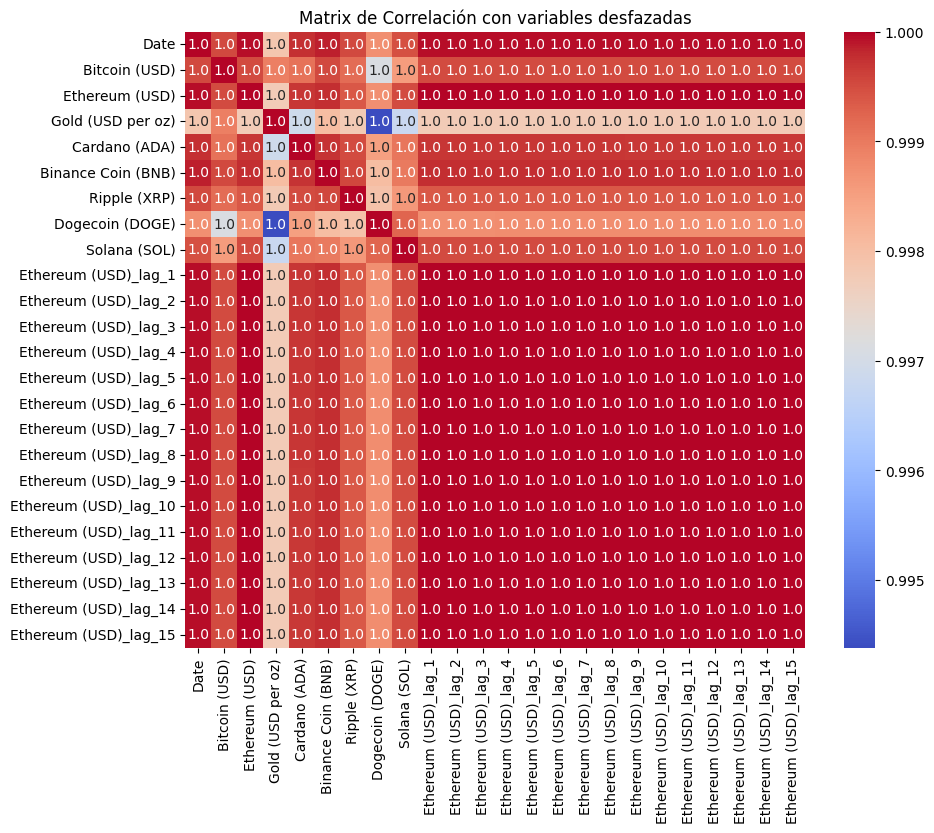

In [13]:
#volver a gradicar las correlaciones
plt.figure(figsize=(10,8))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f",cmap='coolwarm')
plt.title('Matrix de Correlación con variables desfazadas')
plt.tight_layout
plt.show()  

In [14]:
#Vamos a usar el lag 15 de ETH par predecir el precio actual de binance

#seleccionamos como caracteristicas el lag de 15 de ETH

X_train = train[['Ethereum (USD)_lag_15']]
y_train = train['Binance Coin (BNB)']
X_test = test[['Ethereum (USD)_lag_15']]
y_test = test['Binance Coin (BNB)']


In [15]:
!pip install xgboost

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

model = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(),
    'XGBoost': XGBRegressor(objective='reg:squarederror',n_stimators=100,random_state=42)
}
results = {}
for model_name, model in model.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    results[model_name]={'MSE':mse, 'R2':r2}


#mostrar resultados
results_df = pd.DataFrame(results).T
results_df.sort_values(by='R2',ascending=False)
results_df

/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:49:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_stimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,MSE,R2
Linear Regression,0.000200,0.123418
Random Forest,0.000853,-2.731742
Support Vector Machine,0.016711,-72.107919
XGBoost,0.000990,-3.332753


In [17]:
#entrenamos el mejor modelo (linear Regression)
best_model = LinearRegression()
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Resultado de Linear Regressio - MSE: {mse}, R2:{r2}")

Resultado de Linear Regressio - MSE: 0.00020036733323514763, R2:0.12341822246256562


In [19]:
scaler = MinMaxScaler()
#escalar solo el precio de eth
scaler.fit(train[['Ethereum (USD)_lag_15']])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [20]:
# guardar el modelo entregado
from pickle import dump
dump(best_model,open('../models/best_model.pkl','wb'))

#guardar el scaler
dump(scaler,open('../models/scaler.pkl','wb'))